In [3]:
import cv2
import sys
import pytesseract
from matplotlib import pyplot as plt
import imutils
import numpy as np
from PIL import Image
%matplotlib inline

# Pan Card

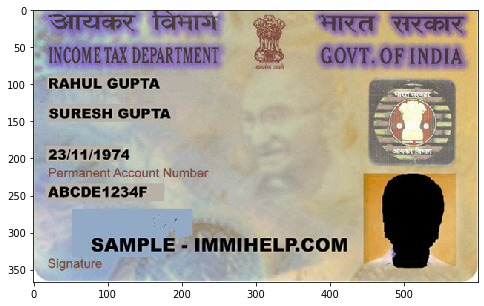

(<matplotlib.image.AxesImage at 0x7f769258e390>, None)

In [75]:
imPath = 'sample-pan-card-front.jpg'
img = cv2.imread(imPath)
plt.imshow(img),plt.show()

In [85]:
import re
config = ('-l eng --oem 1 --psm 3')
im = cv2.imread(imPath, cv2.IMREAD_COLOR)
text = pytesseract.image_to_string(im, config=config)

lines = text.split('\n')
print(lines[1])
#pan_no = re.findall('^[A-Z]{5}[0-9]{4}[A-Z]$', text)
pan_no = re.findall("[A-Z]{5}[0-9]{4}[A-Z]{1}", text)
print(pan_no)

RAHUL GUPTA
['ABCDE1234F']


# Driving Licence

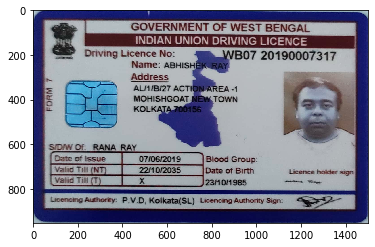

(<matplotlib.image.AxesImage at 0x7f76c43d6d30>, None)

In [4]:
imPath = 'dl-abhi.jpg'
img = cv2.imread(imPath)
plt.imshow(img),plt.show()

In [5]:
config = ('-l eng --oem 1 --psm 1')
im = cv2.imread(imPath, cv2.IMREAD_COLOR)
img_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
text = pytesseract.image_to_string(im, config=config)
print(text)

GOVERNMENT OF WEST BENGAL
INDIAN UNION DRIVING LICENCE

Driving Licence No: BO7 20190007317

Address
AL/1/Bi27 ACTI
MOHISHGOAT
KOL

ae

~
=
x
oO
=

07/06/2019 Blood Group:
22/10/2035 Date of Birth
Wai THT) | x CJ23origes

Licencing Authonty: P.V.D, Kolkata(SL) Licencing Authority Sign: goeS2-—


In [6]:
cnts = np.unique(im.reshape(-1, img.shape[-1]), axis=0, return_counts=True)[1]
maskclr = np.array([[0, 0, 0]])
targetclr = np.unique(im.reshape(-1, img.shape[-1]), axis=0, return_counts=True)[0][np.where(cnts==np.amax(cnts))]

In [7]:
targetclr

array([[177, 181, 186]], dtype=uint8)

In [8]:
im.T

array([[[178, 178, 178, ..., 166, 166, 166],
        [181, 181, 181, ..., 164, 164, 164],
        [183, 183, 183, ..., 162, 161, 160],
        ...,
        [182, 180, 178, ..., 162, 162, 162],
        [180, 178, 176, ..., 162, 162, 162],
        [178, 176, 174, ..., 163, 163, 163]],

       [[196, 196, 196, ..., 184, 184, 184],
        [199, 199, 199, ..., 182, 182, 182],
        [201, 201, 201, ..., 180, 179, 178],
        ...,
        [204, 202, 200, ..., 178, 178, 178],
        [202, 200, 198, ..., 178, 178, 178],
        [200, 198, 196, ..., 179, 179, 179]],

       [[207, 207, 207, ..., 195, 195, 195],
        [210, 210, 210, ..., 193, 193, 193],
        [212, 212, 212, ..., 191, 190, 189],
        ...,
        [215, 213, 211, ..., 190, 190, 190],
        [213, 211, 209, ..., 190, 190, 190],
        [211, 209, 207, ..., 191, 191, 191]]], dtype=uint8)

In [9]:
targetclr[0][0]

177

In [2]:
# Replace white with red... (leaves alpha values alone...)
im = cv2.imread(imPath, cv2.IMREAD_COLOR)
red, green, blue = im.T 
tomaskareas = (red > 30) & (blue > 30) & (green > 30) & (red+blue+green >55)
im[...,][tomaskareas.T] = (targetclr[0][0], targetclr[0][1], targetclr[0][2]) # Transpose back needed
 
im2 = Image.fromarray(im)
im2.show()

NameError: name 'cv2' is not defined

# Adhar Card

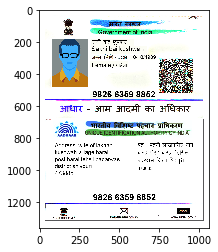

(<matplotlib.image.AxesImage at 0x7f76eed42d68>, None)

In [11]:
imPath = 'aadhar.jpg'
img = cv2.imread(imPath)
plt.imshow(img),plt.show()

In [12]:
config = ('-l eng --oem 1 --psm 3')
im = cv2.imread(imPath, cv2.IMREAD_COLOR)
text = pytesseract.image_to_string(im, config=config)
print(text)

Sakhi bai kushwah
ser fa / DOB : 10/10/1989
Female / fect

    

3Tet - ATA Baal ar afta

AADHAAR UNIGUE|DENTIFICATIONAUTHORITY OF INDIA.

 

Address: wife of lakhan Ud : oat onesie Wa
kushwah village barai ang Une oe deft

post barai tehsil badarwas aexare fore rags
district shivpuri

 

 

 

473885
473885
9826 6359 8852
b4)
4800 300 1947 help @ uidai.gov.in www.uidai.gov.in


In [13]:
import cv2 

img = cv2.imread("dl-abhi.jpg")
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
h,s,v = cv2.split(hsv)

mask = cv2.inRange(hsv, (0,0,0), (180, 50, 130))
dst1 = cv2.bitwise_and(img, img, mask=mask)

th, threshed = cv2.threshold(v, 150, 255, cv2.THRESH_BINARY_INV)
dst2 = cv2.bitwise_and(img, img, mask=threshed)

th, threshed2 = cv2.threshold(s, 30, 255, cv2.THRESH_BINARY_INV)
dst3 = cv2.bitwise_and(img, img, mask=threshed2)

cv2.imwrite("dst1.png", dst1)
cv2.imwrite("dst2.png", dst2)
cv2.imwrite("dst3.png", dst3)

True

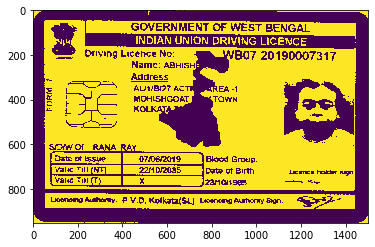

(<matplotlib.image.AxesImage at 0x7f76eecb4080>, None)

In [14]:
img = cv2.imread('dl-abhi.jpg',0)  #pass 0 to convert into gray level 
ret,thr = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(thr),plt.show()

In [15]:
config = ('-l eng --oem 1 --psm 1')
text = pytesseract.image_to_string(thr, config=config)
print(text)

GOVERNMENT OF WEST BENGAL
INDIAN UNION DRIVING LICENCE

Driving Licence No: 07 20190007317
Address

AL/1/B/27 ACT
MOHISHGOAT

ee

~
=
x
o
aw

07/06/20 merz019 Blood Group:
[Vaid TH(NT) | 2210/2035 __—| Date of Birth
(vai THT) =| xs orig

Lucencang Authority: P.V.D, Kotkata(SL) Licencing Authority Sign: gas S2—


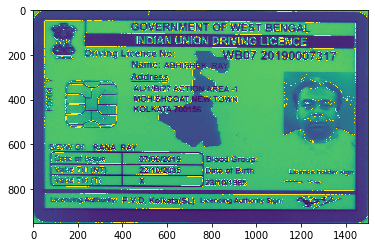

(<matplotlib.image.AxesImage at 0x7f76eec11d68>, None)

In [16]:
img_contours, _ = cv2.findContours(thr, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(img, img_contours, -1, (255, 255, 0))
plt.imshow(img),plt.show()

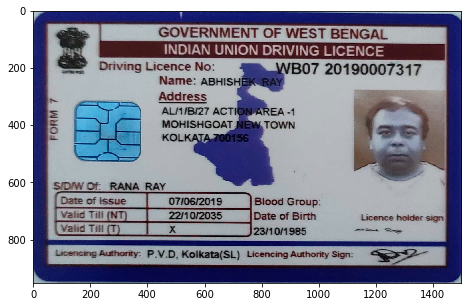

(<matplotlib.image.AxesImage at 0x7f76eebfb4e0>, None)

In [17]:
plt.rcParams['figure.figsize'] = [10, 5]
img = cv2.imread('dl-abhi.jpg')
plt.imshow(img),plt.show()

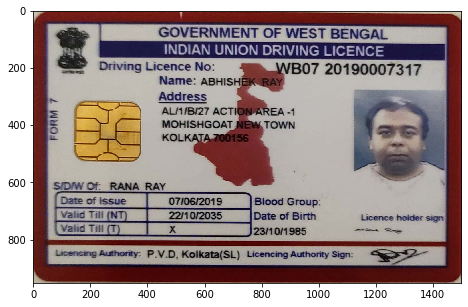

In [18]:
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

plt.imshow(cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB))

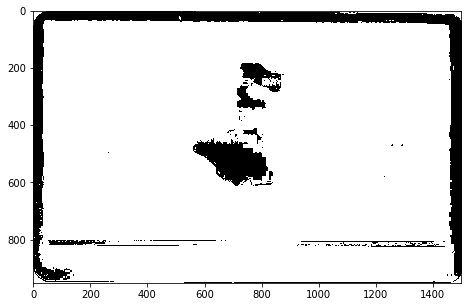

In [19]:
# threshold for hue channel in blue range
blue_min = np.array([0, 66.37, 90], np.uint8)
blue_max = np.array([10,255,255], np.uint8)
mask_inverse = cv2.inRange(img_hsv, blue_min, blue_max)
mask = cv2.bitwise_not(mask_inverse)
plt.imshow(cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB))

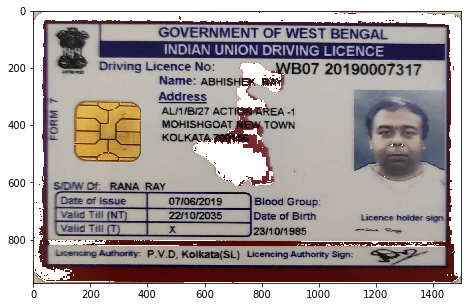

In [20]:
mask_rgb = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB)
# perform bitwise and on mask to obtain cut-out image that is not blue
masked_upstate = cv2.bitwise_and(img, mask_rgb)

# replace the cut-out parts with white
masked_replace_white = cv2.addWeighted(masked_upstate, 1, \
                                       cv2.cvtColor(mask_inverse, cv2.COLOR_GRAY2RGB), 1, 0)

plt.imshow(cv2.cvtColor(masked_replace_white, cv2.COLOR_BGR2RGB))

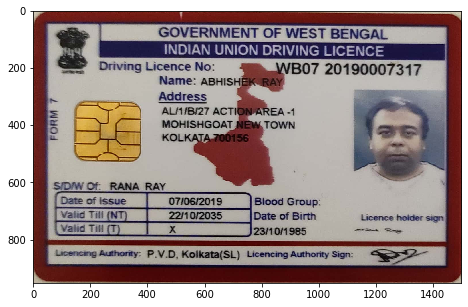

In [21]:
image = cv2.imread('dl-abhi.jpg')
image_copy = np.copy(image)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)
plt.imshow(image_copy)

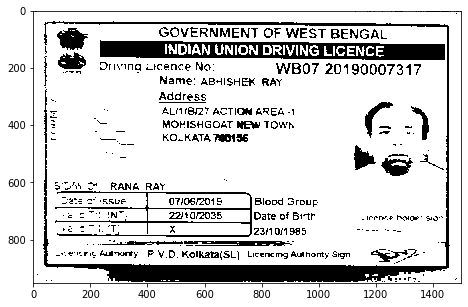

In [22]:
lower_blue = np.array([80, 0, 0])     ##[R value, G value, B value]
upper_blue = np.array([255, 200, 250]) 
mask = cv2.inRange(image_copy, lower_blue, upper_blue)
plt.imshow(mask, cmap='gray')

In [23]:
config = ('-l eng --oem 1 --psm 1')
text = pytesseract.image_to_string(mask, config=config)
print(text)

GOVERNMENT OF WEST BENGAL

od INDIAN UNION DRIVING LICENCE
ab

ME Driving Licence No: WB07 20190007317

       
     
    
 

Name: ABHISHEK RAY
~ Address
< me AL/1/B/27 ACTION AREA -1
= “~~ MOHISHGOAT NEW TOWN f ~ -}
= CKOLKATA 7900156 ~~

 
     

 
 
 
  

 
 

Blood Group

07/06/2019
aa 0/2035 Date of Birth Licence holder sigr
23/10/1985 ie

Lo 2 a TT TM SSL
meencing buthonty P.V.D. Kolkata(SL) Licencing Authonty Sign:


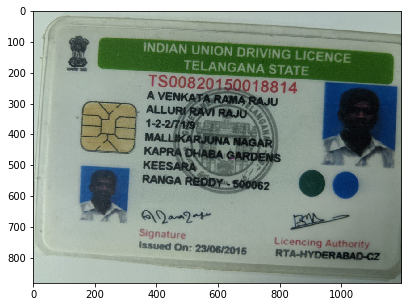

In [25]:
tel_lic_image = cv2.imread('sample-dl-1.png')
tel_lic_image_copy = np.copy(tel_lic_image)
tel_lic_image_copy = cv2.cvtColor(tel_lic_image_copy, cv2.COLOR_BGR2RGB)
plt.imshow(tel_lic_image_copy)

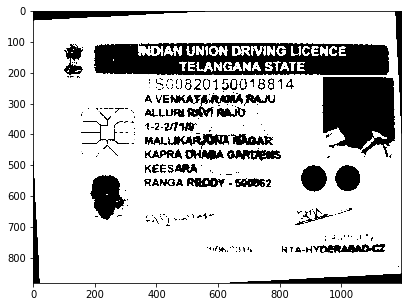

In [66]:
# Otsu's thresholding
tel_lic_image_gray = cv2.cvtColor(tel_lic_image_copy, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(tel_lic_image_gray, (5, 5), 0)
ret2,th2 = cv2.threshold(blurred,78,255,cv2.THRESH_BINARY)
rotated = imutils.rotate(th2, 3)
kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
rotated = cv2.filter2D(rotated, -1, kernel)
plt.imshow(rotated, cmap=plt.cm.gray)

In [67]:
config = ('-l eng --oem 1 --psm 1')
text = pytesseract.image_to_string(rotated, config=config)
print(text)

™$00820150018814
A VENKATS. RAMA RAJU
ALLURI RAJ.
1-2-2074: oO
MALLIKARJONA WAGAR
KAPRA DHABA GARDENS -

KEESARA .
RANGA RRODY - 590862 © @

. “yl a
CAS) a aree =e

arm ay

OBI OVS RTA-HYDERABAD-CZ


In [72]:
import re
zip = re.findall("(?:[^\d]|^)(\d{6})(?:[^\d]|$)", text)
print(zip)

['590862']


In [73]:
lic_no = re.findall("(?:[^\d]|^)(\d{14})(?:[^\d]|$)", text)
print(lic_no)

['00820150018814']
